<a href="https://colab.research.google.com/github/kasidhitdan/data_science_PYTHON/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Read data from a CSV file named 'Iris.csv' into a DataFrame
df = pd.read_csv('Iris.csv')

# Print the first few rows of the DataFrame to check if the data is loaded correctly
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Get the shape of the DataFrame
df.shape

(150, 6)

In [ ]:
# Check for missing values in the DataFrame
total_missing_values = df_loan.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)

Total missing values in the DataFrame: 0


In [ ]:
#Remove Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Drop the 'Species' column from the DataFrame to create the feature set (X)
X = df.drop('Species',axis=1)
# Select the 'Species' column as the target variable (y)
y = df['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=99)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating an instance of the DecisionTreeClassifier model
dtree = DecisionTreeClassifier()

In [ ]:
# Fit the DecisionTreeClassifier model to the training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
import pickle
filename = 'model.sav'

# Use the pickle module to dump (save) the trained model (dtree) to the specified filename
# 'wb' mode is used to write binary data
pickle.dump(dtree, open(filename, 'wb'))

In [ ]:
# Use the pickle module to load (deserialize) the trained model from the specified filename
# 'rb' mode is used to read binary data
dtree = pickle.load(open(filename,'rb'))
dtree

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#DecisionTreeClassifier model to make predictions on the test data
print(classification_report(y_test,predictions,digits=4))

                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        15
Iris-versicolor     1.0000    1.0000    1.0000        15
 Iris-virginica     1.0000    1.0000    1.0000        15

       accuracy                         1.0000        45
      macro avg     1.0000    1.0000    1.0000        45
   weighted avg     1.0000    1.0000    1.0000        45



In [ ]:
# crate confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


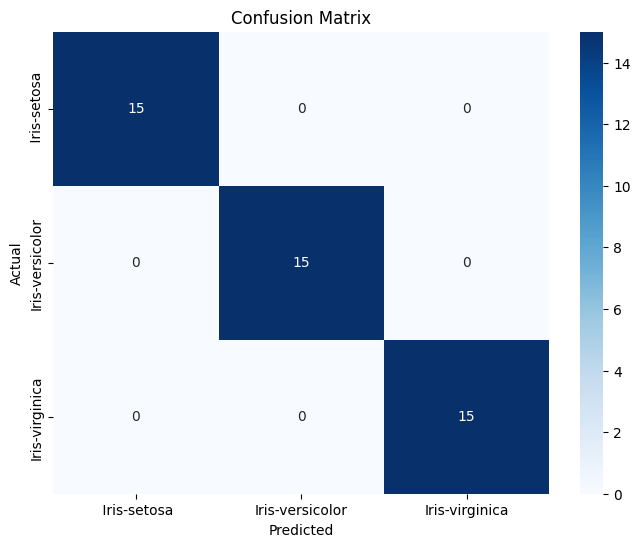

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[' Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=[' Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[Text(0.4, 0.8333333333333334, 'x[3] <= 2.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 100.5\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

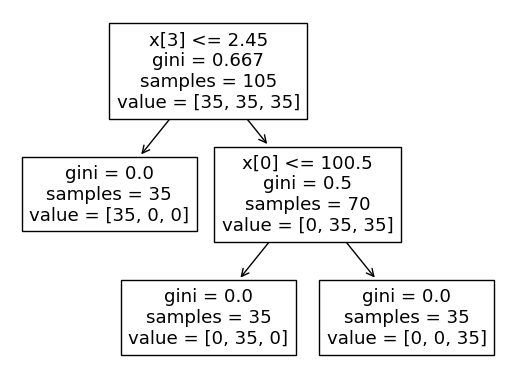

In [ ]:
from sklearn import tree
tree.plot_tree(dtree)

In [ ]:
print(X.columns) # feature names
print(y.unique().tolist()) # class names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


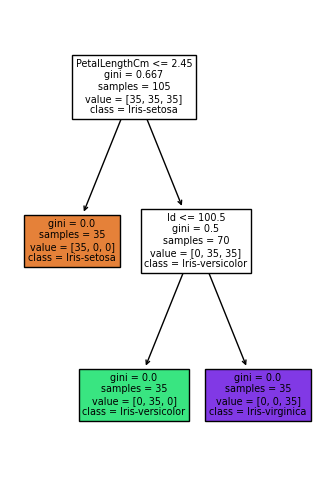

In [ ]:
# Plot the decision tree
fn=X.columns # feature names
cn=y.unique().tolist() # class names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,6), dpi=100)
tree.plot_tree(dtree,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')